<a href="https://colab.research.google.com/github/Templasan/DSM---Projeto-de-API-1-Semestre/blob/main/Exportacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
low_memory=False

###Importar base de dados

In [2]:
#NECESSARIO DADOS DE 2013 A 2023
exportacoes2013 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2013_MUN.csv'
exportacoes2014 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2014_MUN.csv'
exportacoes2015 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2015_MUN.csv'
exportacoes2016 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2016_MUN.csv'
exportacoes2017 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2017_MUN.csv'
exportacoes2018 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2018_MUN.csv'
exportacoes2019 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2019_MUN.csv'
exportacoes2020 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2020_MUN.csv'
exportacoes2021 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2021_MUN.csv'
exportacoes2022 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2022_MUN.csv'
exportacoes2023 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2023_MUN.csv'

#tabelas para integrar codigos
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'
pais = 'https://balanca.economia.gov.br/balanca/bd/tabelas/PAIS.csv'

# tipos de dados para cada tabela
dtype_mun = {'CO_MUN_GEO':'int32', 'NO_MUN':'category'}
dtype_sh4 = {'CO_SH4':'int16', 'NO_SH4_POR':'category'}
dtype_pais = {'CO_PAIS':'int16', 'NO_PAIS':'category'}
dtype_df = {'CO_ANO':'int16' , 'CO_MES': 'int8', 'SH4': 'int16', 'CO_PAIS' : 'int16','CO_MUN': 'int32',
            'KG_LIQUIDO': 'int32','VL_FOB': 'int64', 'SG_UF_MUN':'category'}

#LEITURA DA tabelas de codigos
df_mun = pd.read_csv(mun, sep=";", encoding="latin1", usecols=['CO_MUN_GEO', 'NO_MUN'], dtype = dtype_mun)
df_sh4 = pd.read_csv(sh4, sep=";", encoding="latin1", usecols=['CO_SH4', 'NO_SH4_POR'], dtype = dtype_sh4)
df_pais = pd.read_csv(pais, sep=";",encoding="latin1", usecols=['CO_PAIS', 'NO_PAIS'], dtype = dtype_pais)


### IMPORTAR TODOS OS DADOS DESDE 2013

In [3]:
df = pd.DataFrame()
#LER TODOS AS TABELAS
df_2013 = pd.read_csv(exportacoes2013, sep=";", encoding="latin1",dtype=dtype_df)
df_2014 = pd.read_csv(exportacoes2014, sep=";", encoding="latin1",dtype=dtype_df)
df_2015 = pd.read_csv(exportacoes2015, sep=";", encoding="latin1",dtype=dtype_df)
df_2016 = pd.read_csv(exportacoes2016, sep=";", encoding="latin1",dtype=dtype_df)
df_2017 = pd.read_csv(exportacoes2017, sep=";", encoding="latin1",dtype=dtype_df)
df_2018 = pd.read_csv(exportacoes2018, sep=";", encoding="latin1",dtype=dtype_df)
df_2019 = pd.read_csv(exportacoes2019, sep=";", encoding="latin1",dtype=dtype_df)
df_2020 = pd.read_csv(exportacoes2020, sep=";", encoding="latin1",dtype=dtype_df)
df_2021 = pd.read_csv(exportacoes2021, sep=";", encoding="latin1",dtype=dtype_df)
df_2022 = pd.read_csv(exportacoes2022, sep=";", encoding="latin1",dtype=dtype_df)
df_2023 = pd.read_csv(exportacoes2023, sep=";", encoding="latin1",dtype=dtype_df)

#ADICIONAR A DATAFRAME PRINCIPAL
df = pd.concat([df,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022,df_2023])


### COMEÇAR TRATAMENTO DE DADOS

In [4]:
#Tratar Tipos
df_mun = df_mun.astype({'CO_MUN_GEO':'int32', 'NO_MUN':'category'})
df = df.astype({'CO_ANO':'int16' , 'CO_MES': 'int8', 'SH4': 'int16', 'CO_PAIS' : 'int16','CO_MUN': 'int32', 'KG_LIQUIDO': 'int32','VL_FOB': 'int64', 'SG_UF_MUN':'category'})
df_sh4 = df_sh4.astype({'CO_SH4':'int16', 'NO_SH4_POR':'category'})
df_pais = df_pais.astype({'CO_PAIS':'int16', 'NO_PAIS':'category'})

#Renomear colunas antes de mesclar dados para compatibilidade
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})
df_sh4 = df_sh4.rename(columns={"CO_SH4": "SH4", "NO_SH4_POR": "PRODUTO"})

#remover duplicatas de sh4
df_sh4 = df_sh4.drop_duplicates(subset=["SH4"])
#mesclar DF
df_mescla = df.merge(df_mun, on=["CO_MUN"], how="left")
df_mescla = df_mescla.merge(df_sh4, on=["SH4"], how="left")
df_mescla = df_mescla.merge(df_pais, on=["CO_PAIS"], how="left")
df_mescla = df_mescla.reset_index(drop=True)


In [5]:
#Criando coluna valor agregado
df_mescla["VALOR_AGREGADO"] = df_mescla["VL_FOB"] / df_mescla["KG_LIQUIDO"]
# Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_mescla = df_mescla[df_mescla["KG_LIQUIDO"] > 0].reset_index()

###FILTRAR PARA SP E RENOMEAR COLUNAS

In [6]:
##RENOMEAR COLUNAS
df_mescla = df_mescla.rename(columns ={'CO_ANO': 'ANO', 'CO_MES': 'MES', 'SG_UF_MUN': 'UF', 'NO_MUN': 'MUN', 'NO_PAIS': 'PAIS' })
#filtrar UF para SP
df_mescla = df_mescla.loc[df_mescla['UF'] == 'SP'].reset_index()

#display(df_mescla[['ANO', 'MES', 'PAIS', 'UF', 'MUN' , 'KG_LIQUIDO', 'VL_FOB', 'VALOR_AGREGADO' , 'PRODUTO']])

In [7]:
#Confirmando se existem duplicados
df_mescla.duplicated().sum()
#resetando index
df_mescla = df_mescla.reset_index(drop=True)
df_mescla = df_mescla.drop(columns=["level_0", "index"], errors="ignore")
#display(df_mescla.sample(7))

###Gerando graficos com matplotlib

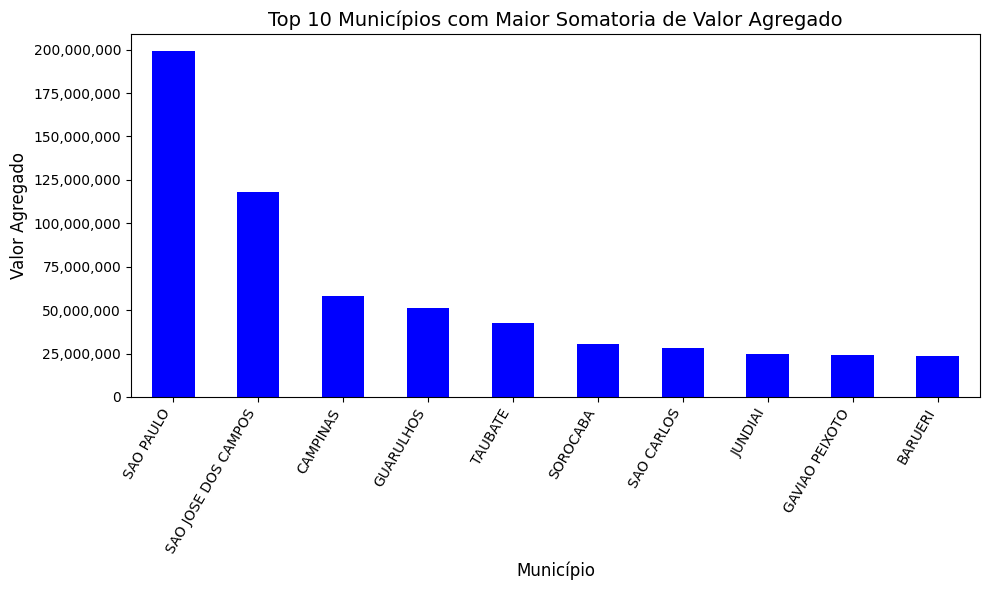

In [8]:
#selecionar qual ano deseja ver as informações
anos = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
df_ano = df_mescla.loc[df_mescla['ANO'].isin(anos)]

#MUNICIPIOS QUE MAIS EXPORTARAM VALOR AGREGADO
top_municipio = df_ano.groupby(["MUN"],observed=True)['VALOR_AGREGADO'].sum()
top_municipio = top_municipio.sort_values(ascending=False).head(10)
#display(top_municipio)

# Gerar gráfico de barras
plt.figure(figsize=(10, 6))  # Tamanho da figura
top_municipio.plot(kind="bar", color="blue")

# Adicionar título e rótulos
plt.title("Top 10 Municípios com Maior Somatoria de Valor Agregado", fontsize=14)
plt.xlabel("Município", fontsize=12)
plt.ylabel("Valor Agregado", fontsize=12)

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Exibir o gráfico
plt.xticks(rotation=60, ha='right')  # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()  # Ajusta o layout para não cortar os rótulos
plt.show()

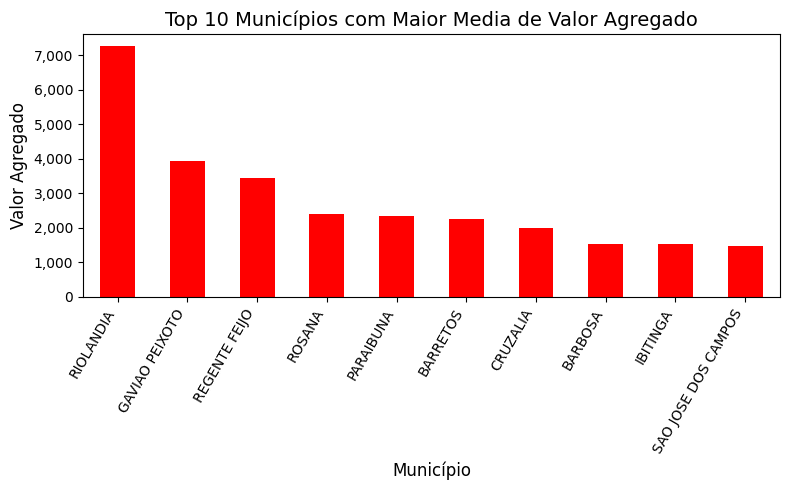

In [9]:
#selecionar qual ano deseja ver as informações
anos = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
df_ano = df_mescla.loc[df_mescla['ANO'].isin(anos)]

# Agrupar por município e SH4 (ITEM) e calcular a MEDIA DO VALOR AGREGADO de cada item no municipio
municipios_agregado = df_ano.groupby(["MUN"],observed=True)['VALOR_AGREGADO'].mean()
municipios_top10 = municipios_agregado.sort_values( ascending=False).head(10)

# Gerar gráfico de barras
plt.figure(figsize=(8, 5))
municipios_top10.plot(kind="bar", color="red")

# Adicionar título e rótulos
plt.title("Top 10 Municípios com Maior Media de Valor Agregado", fontsize=14)
plt.xlabel("Município", fontsize=12)
plt.ylabel("Valor Agregado", fontsize=12)

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Exibir o gráfico
plt.xticks(rotation=60, ha='right')  # Rotaciona os rótulos do eixo X para melhor visualização
plt.tight_layout()  # Ajusta o layout para não cortar os rótulos
plt.show()

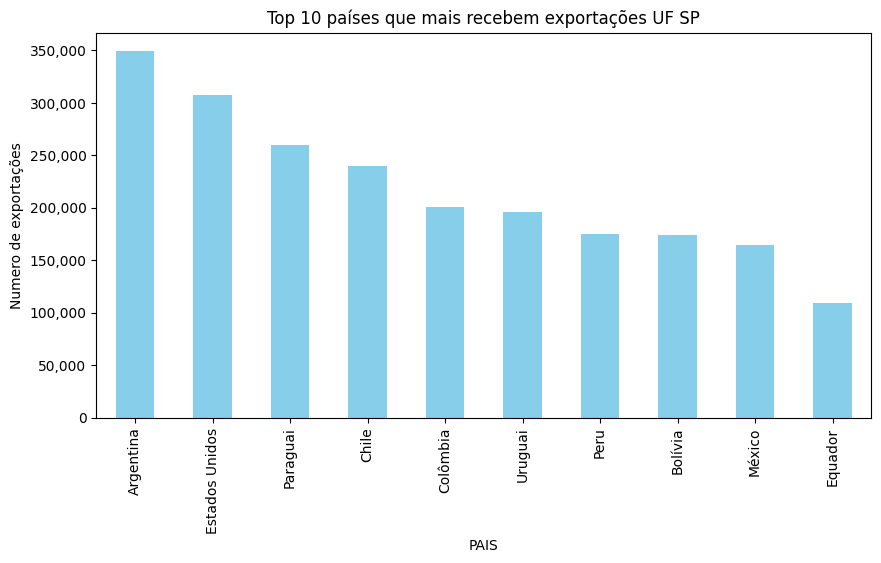

In [10]:
#TOP PAISES QUE MAIS RECEBERAM EXPORTAÇÕES do ESTADO de SP
#selecionar qual ano deseja ver as informações
anos = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
df_ano = df_mescla.loc[df_mescla['ANO'].isin(anos)]
# Contar ocorrências
contagem_paises = df_ano.PAIS.value_counts()

# Criar o gráfico
plt.figure(figsize=(10, 5))
contagem_paises.plot(kind='bar', color='skyblue')

# Personalizar o gráfico
plt.title('Top 10 países que mais recebem exportações UF SP')
plt.xlabel('Países')
plt.ylabel('Numero de exportações')
plt.xticks(rotation=45)  # Rotacionar os nomes dos países para melhor visualização
# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

contagem_paises.head(10).plot(kind='bar', color='skyblue')
plt.show()

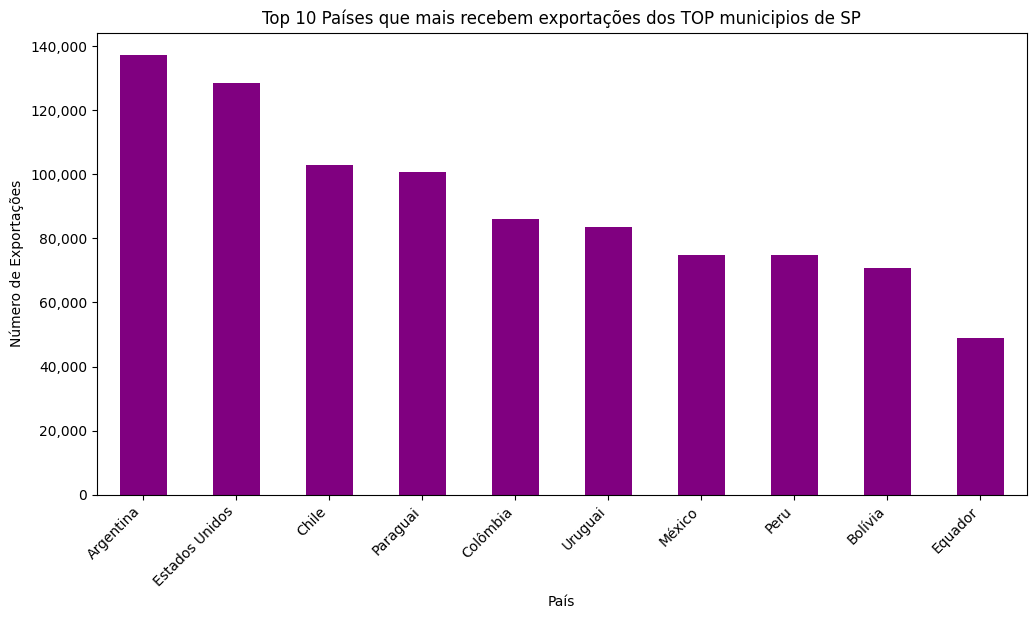

In [11]:
#PAISES QUE RECEBEM EXPORTAÇÃO DOS TOP MUNICIPIOS DE SP
#selecionar qual ano deseja ver as informações
anos = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
df_ano = df_mescla.loc[df_mescla['ANO'].isin(anos)]

# Filtrando os municípios
df_ano["MUN"] = df_ano["MUN"].str.upper().str.strip()
cidades_top = ["SAO PAULO", "CAMPINAS", "SAO BERNARDO DO CAMPO", "SOROCABA",
               "JUNDIAI", "GUARULHOS", "VINHEDO", "SAO JOSE DOS CAMPOS", "BARUERI", "INDAIATUBA"]
df_filtrado = df_ano[df_ano["MUN"].isin(cidades_top)]

# Contar o número de exportações por país
paises_exportacao = df_filtrado["PAIS"].value_counts()

# Selecionar os 10 países mais exportados
top_10_paises = paises_exportacao.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar', color='purple')

# Personalizar o gráfico
plt.xlabel("País")
plt.ylabel("Número de Exportações")
plt.title("Top 10 Países que mais recebem exportações dos TOP municipios de SP")
plt.xticks(rotation=45, ha='right')

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Mostrar o gráfico
plt.show()

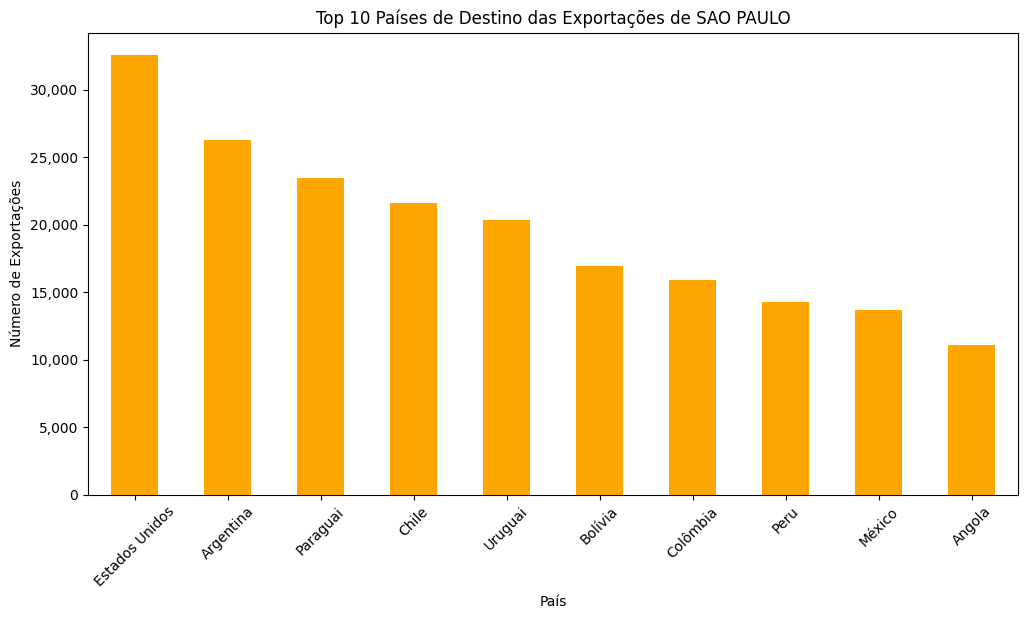

In [12]:
#selecionar qual ano deseja ver as informações
anos = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
df_ano = df_mescla.loc[df_mescla['ANO'].isin(anos)]

# Escolher o município de interesse (exemplo: 'SAO PAULO')
municipio_especifico = 'SAO PAULO'

df_municipio = df_ano[df_ano["MUN"].str.upper() == municipio_especifico.upper()]

# Contar o número de exportações por país
paises_exportacao = df_municipio["PAIS"].value_counts()

# Selecionar os 10 países mais exportados (se houver pelo menos 10)
top_10_paises = paises_exportacao.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar', color='orange')

# Personalizar o gráfico
plt.xlabel("País")
plt.ylabel("Número de Exportações")
plt.title(f"Top 10 Países de Destino das Exportações de {municipio_especifico}")
plt.xticks(rotation=45)

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# Mostrar o gráfico
plt.show()

**PEQUISAS DE INFORMAÇÃO**


**Pesquisa de Informações por Municípios**

In [13]:
# Escolher o município de interesse (exemplo: 'SAO PAULO')
municipio_especifico = input("Digite o nome do município: ")
df_municipio = df_mescla[df_mescla["MUN"].str.upper() == municipio_especifico.upper()]

# Corrected line: using a list of column names within double square brackets
display(df_municipio[['PRODUTO', 'PAIS', 'VALOR_AGREGADO']].sample(10))

Digite o nome do município: Sao paulo


,PRODUTO,PAIS,VALOR_AGREGADO
3806764,"Obras de carpintaria para construções, incluíd...",Uruguai,2.243537
1500353,Outros tecidos de malha,Argentina,16.482143
1991195,Aparelhos de iluminação (incluídos os projecto...,Alemanha,85.179104
2590040,Partes e acessórios dos veículos automóveis da...,Peru,9.753117
1284132,Artefatos de vidro para sinalização e elemento...,Reino Unido,5.933333
329721,Aparelhos elétricos para telefonia ou telegraf...,Suíça,1314.935065
719347,Misturas de substâncias odoríferas e misturas ...,Peru,14.438346
3041695,"Carrosséis, baloiços, instalações de tiro ao a...",Paraguai,8.181818
1459269,"Armações para óculos e artigos semelhantes, e ...",Itália,671.573034
2402046,Outras obras de plástico e obras de outras mat...,Singapura,8.400000


**Pesquisa de Informação por Código**

In [14]:
# Pesquisar por um código SH4 específico (exemplo: 4407)
codigo_sh4 = input("Digite o código SH4 que deseja pesquisar: ")

# Filtrar o DataFrame df_sh4 para encontrar o produto associado ao código SH4
produto_encontrado = df_sh4[df_sh4["SH4"] == int(codigo_sh4)]

# Verificar se um produto foi encontrado
if not produto_encontrado.empty:
  print(f"Produto encontrado para o código SH4 {codigo_sh4}:")
  print(produto_encontrado)
else:
  print(f"Nenhum produto encontrado para o código SH4 {codigo_sh4}.")


Digite o código SH4 que deseja pesquisar: 4408
Produto encontrado para o código SH4 4408:
       SH4                                            PRODUTO
2785  4408  Folhas para folheados (incluindo as obtidas po...


**Pesquisar Top 10 Destino de Exportações por Município**

Digite o nome do município: Taubate


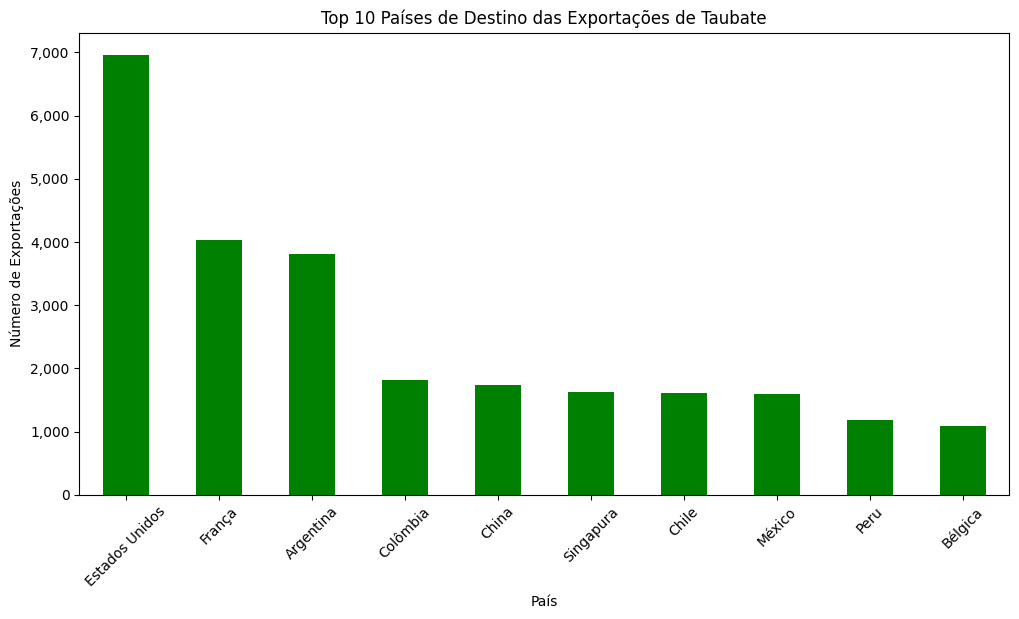

In [15]:
#selecionar qual ano deseja ver as informações
anos = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
df_ano = df_mescla.loc[df_mescla['ANO'].isin(anos)]

# Escolher o município de interesse (exemplo: 'SAO PAULO')
municipio_especifico = input("Digite o nome do município: ")
df_municipio = df_ano[df_ano["MUN"].str.upper() == municipio_especifico.upper()]

# Contar o número de exportações por país
paises_exportacao = df_municipio["PAIS"].value_counts()

# Selecionar os 10 países mais exportados (se houver pelo menos 10)
top_10_paises = paises_exportacao.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar', color='green')

# Personalizar o gráfico
plt.xlabel("País")
plt.ylabel("Número de Exportações")
plt.title(f"Top 10 Países de Destino das Exportações de {municipio_especifico}")
plt.xticks(rotation=45)

# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Mostrar o gráfico
plt.show()


**Comparação entre Municípios**


Digite o nome do primeiro município: Sao jose dos campos
Digite o nome do segundo município: Campinas


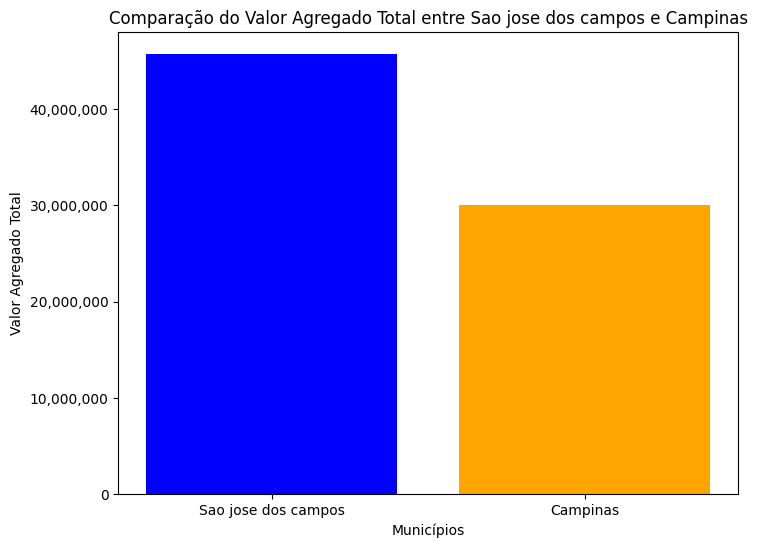

In [16]:
#selecionar qual ano deseja ver as informações
anos = [2019,2020,2021,2022,2023,]
df_ano = df_mescla.loc[df_mescla['ANO'].isin(anos)]

# Escolha os municípios que deseja comparar
municipio1 = input("Digite o nome do primeiro município: ")
municipio2 = input("Digite o nome do segundo município: ")

# Filtrar o DataFrame para os municípios escolhidos
df_municipio1 = df_ano[df_ano["MUN"].str.upper() == municipio1.upper()]
df_municipio2 = df_ano[df_ano["MUN"].str.upper() == municipio2.upper()]

# Calcular o valor agregado total para cada município
valor_agregado_municipio1 = df_municipio1["VALOR_AGREGADO"].sum()
valor_agregado_municipio2 = df_municipio2["VALOR_AGREGADO"].sum()

# Criar um gráfico de barras para comparar os valores agregados
plt.figure(figsize=(8, 6))
plt.bar([municipio1, municipio2], [valor_agregado_municipio1, valor_agregado_municipio2], color=['blue', 'orange'])

plt.xlabel("Municípios")
plt.ylabel("Valor Agregado Total")
plt.title(f"Comparação do Valor Agregado Total entre {municipio1} e {municipio2}")
# Formatar valores do eixo Y com separadores de milhar
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

**GRAFICO DE SAZONALIDADE**

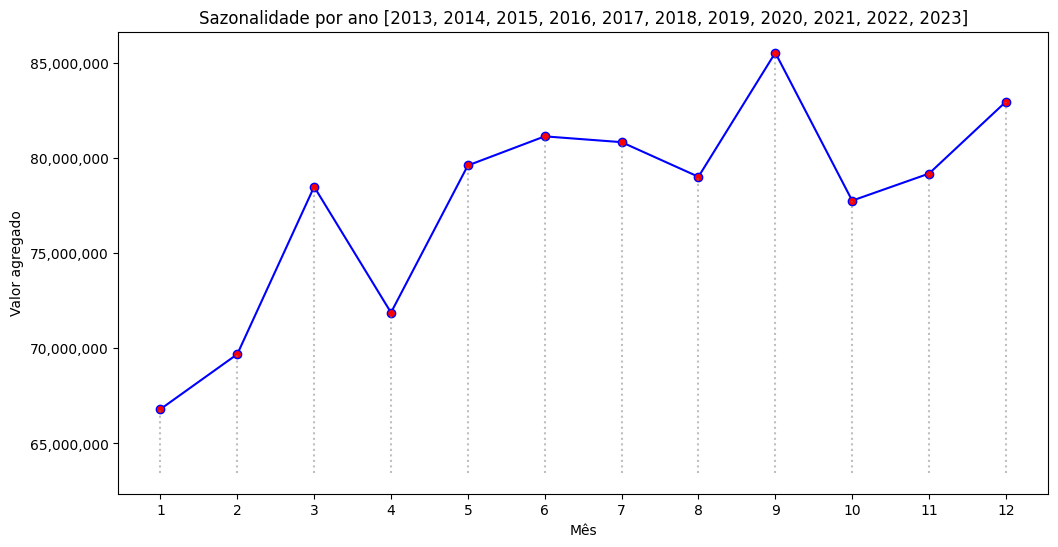

In [17]:
#selecionar qual ano deseja ver as informações
anos = [2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
df_ano = df_mescla.loc[df_mescla['ANO'].isin(anos)]
#agrupar por mes
sazonalidade = df_ano.groupby(['MES'])['VALOR_AGREGADO'].sum()

#plotando grafico
plt.figure(figsize=(12, 6))
plt.plot(sazonalidade, marker='o', linestyle='-', color='blue', markerfacecolor='red')

#Editando Labell
plt.title(f'Sazonalidade por ano {anos}')
plt.xlabel('Mês')
plt.ylabel('Valor agregado')

#editando grid(ticks)
xticks = range(1, 13)
sazonalidade_min = sazonalidade.min()
plt.xticks(xticks)
plt.vlines(x=xticks, ymin= sazonalidade_min*0.95, ymax=sazonalidade.loc[xticks], colors='gray', linestyles='dotted',alpha=0.5)

#formando valores numericos
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()
